In [1]:
#this is my minor project
#thanks to verzeo team and mentors to provide me this oppurtunity
#learning machine learning with verzeo

In [3]:
import pandas as pd
import numpy as np

In [121]:
dataset=pd.read_csv("StudentsPerformance.csv")
#imported my datset

In [122]:
dataset.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [38]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [26]:
import seaborn as sns
sns.set()#to just more good and creative graphs
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo

In [7]:
type(dataset)#dataset is dataframe 

pandas.core.frame.DataFrame

In [8]:
dataset.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
cf.go_offline()

In [10]:
gender=dataset["gender"]

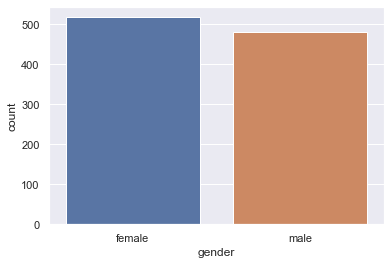

In [11]:
sns.countplot(gender)#this gives number of female and male

In [12]:
dataset.iplot(kind="histogram",yTitle="Count",xTitle="Various Values")
##this give the count of each item or value of graph
##also it is interactive graph ie you can check the value and also zoom in zoom out and many more features

In [13]:
dataset.lunch.unique()#shows how many values are there

array(['standard', 'free/reduced'], dtype=object)

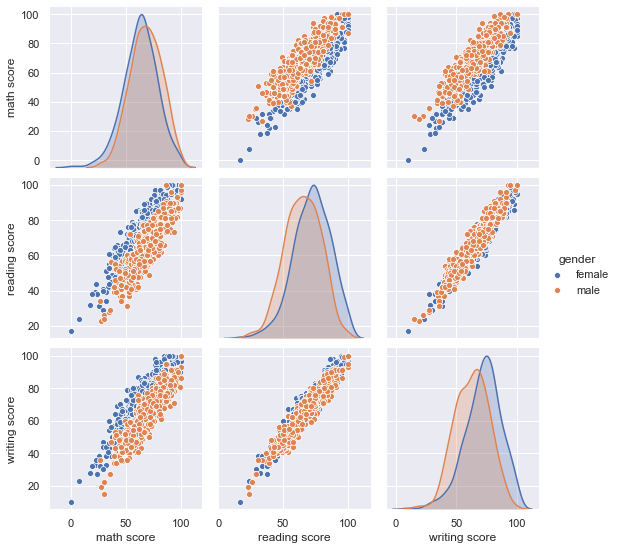

In [14]:
sns.pairplot(dataset, hue='gender')
#these graphs depicts the relation or distribution between two quanitities on the basis of gender 

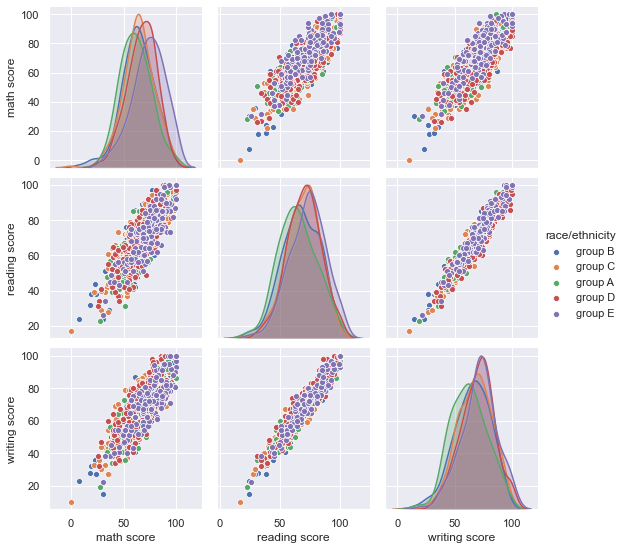

In [15]:
sns.pairplot(dataset, hue='race/ethnicity')
#plot of various scores on the basis of ethnicity 

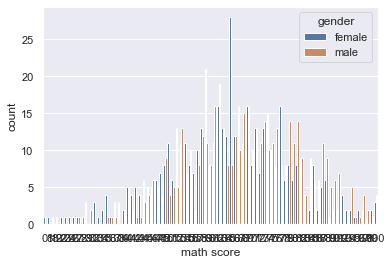

In [16]:
sns.countplot(data=dataset,x="math score",hue="gender")

In [17]:
#lets see the dependencies of maths scores



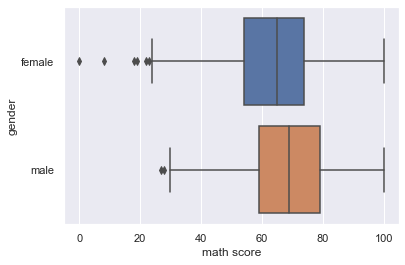

In [18]:
#since above graph is not readable
#we go instead for box plot
sns.boxplot(data=dataset,x="math score",y="gender")
#this graph gives refrence to min and maximum marks of both gender

In [19]:
#or for more interactable graph we gor for cufflinks
dataset_new=dataset[["parental level of education","math score"]]

In [20]:
dataset_new.head(2)

,parental level of education,math score
0,bachelor's degree,72
1,some college,69


In [29]:
dataset[["math score","gender"]].pivot(columns="gender",values="math score").iplot(x='math score' , y='gender', kind='box', mode='markers',xTitle="gender",yTitle="Maths score",title="Maths Score Vs Gender")
##this gives maths marks realtion to gender
#and this dataset is coincidently telling the peoples' common stereoptypes males are good at maths as comapre to females!!

In [22]:
dataset[["math score","parental level of education"]].pivot(columns="parental level of education",values="math score").iplot(kind="box",yTitle="maths score",title="Maths Score Vs Parental level of education",xTitle="parental level of education")
#
#so this graph gives details about the relation between maths score and parental level education

In [23]:
dataset[["math score","lunch"]].pivot(columns="lunch",values="math score").iplot(kind="box",yTitle="maths score",title="Maths Score Vs Lunch",xTitle="lunch types")

In [24]:
dataset[["math score","race/ethnicity"]].pivot(columns="race/ethnicity",values="math score").iplot(kind="box",xTitle="Various Races",yTitle="maths score",title="Maths Score Vs Races")
#depicts relation between maths score vs races;

In [37]:
dataset[["math score","test preparation course"]].pivot(columns="test preparation course",values="math score").iplot(kind="box",yTitle="Maths Scores",xTitle="Test Prepration Course Completion Status",title="Maths vs Test Preparation Course Status")
#
#you can see that students those who have completed their course has higher median scores in maths
##therefore we should study....

In [ ]:
#now lets found the weights of features on which maths score depends

In [46]:
dataset_new=dataset[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score']]

In [117]:
dataset_new.isnull().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
dtype: int64

In [47]:
y=dataset_new['math score']


In [50]:
gender=dataset_new['gender']
gender=pd.get_dummies(gender,drop_first=True)


In [51]:
race=dataset_new['race/ethnicity']
race=pd.get_dummies(race,drop_first=True)

In [52]:
ple=dataset_new['parental level of education']
ple=pd.get_dummies(ple,drop_first=True)

In [53]:
lunch=dataset_new['lunch']
lunch=pd.get_dummies(lunch,drop_first=True)

In [54]:
tpc=dataset_new['test preparation course']
tpc=pd.get_dummies(tpc,drop_first=True)

In [55]:
X=pd.concat([gender,race,ple,lunch,tpc],axis=1)

In [118]:
X

,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [105]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model=LinearRegression()

In [108]:
model.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred=model.predict(X_test)

In [115]:
model.coef_
##this gives weights of X columns to the dependencies of maths score

array([ 4.8855744 , -0.86113597,  0.58423475,  3.05720132,  8.49864971,
        3.12316339, -4.26738745,  0.33602497,  0.4048791 , -2.71616285,
       11.07864074, -5.67256054])

In [119]:

###now see this all for reading score

In [123]:
dataset[["reading score","gender"]].pivot(columns="gender",values="reading score").iplot(x='reading score' , y='gender', kind='box', mode='markers',xTitle="gender",yTitle="Reading score",title="Reading Score Vs Gender")
##this gives reading score marks realtion to gender
##median reading score of female is better than males

In [146]:
dataset[["reading score","parental level of education"]].pivot(columns="parental level of education",values="reading score").iplot(kind="box",yTitle="Reading score",title="Reading Score Vs Parental level of education",xTitle="parental level of education")
##
#so this graph gives details about the relation between Reading score and parental level education

In [125]:
dataset[["reading score","lunch"]].pivot(columns="lunch",values="reading score").iplot(kind="box",yTitle="reading score",title="Reading Score Vs Lunch",xTitle="lunch types")

In [126]:
dataset[["reading score","race/ethnicity"]].pivot(columns="race/ethnicity",values="reading score").iplot(kind="box",xTitle="Various Races",yTitle="Reading score",title="Reading Score Vs Races")
#depicts relation between reading score vs races;

In [127]:
dataset[["reading score","test preparation course"]].pivot(columns="test preparation course",values="reading score").iplot(kind="box",yTitle="Maths Scores",xTitle="Test Prepration Course Completion Status",title="Reading vs Test Preparation Course Status")
#
#you can see that students those who have completed their course has higher median scores in reading
##therefore we should study....

In [128]:
dataset_new=dataset[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score']]

In [136]:
y=dataset_new['reading score']

In [137]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [138]:
model.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred=model.predict(X_test)

In [142]:
model.coef_
#this gives the weights of reading score with respect to X coloumns

array([-6.88134831, -1.0717948 ,  0.70380088,  2.45462178,  4.21780921,
        3.04490247, -4.41672127,  1.06571098, -0.70975032, -2.41325869,
        7.27005362, -7.01305074])

In [144]:
##now lets do it for writing score

In [145]:
dataset[["writing score","gender"]].pivot(columns="gender",values="writing score").iplot(x='writing score' , y='gender', kind='box', mode='markers',xTitle="gender",yTitle="Writing score",title="Writing Score Vs Gender")
##this gives writing score marks realtion to gender
##median writing score of female is better than males

In [148]:
dataset[["writing score","parental level of education"]].pivot(columns="parental level of education",values="writing score").iplot(kind="box",yTitle="Writing score",title="Writing Score Vs Parental level of education",xTitle="parental level of education")
##
#so this graph gives details about the relation between Writing score and parental level education

In [152]:
dataset[["writing score","lunch"]].pivot(columns="lunch",values="writing score").iplot(kind="box",yTitle="writing score",title="writing Score Vs Lunch",xTitle="lunch types")

In [153]:
dataset[["writing score","race/ethnicity"]].pivot(columns="race/ethnicity",values="writing score").iplot(kind="box",xTitle="Various Races",yTitle="Writing score",title="Writing Score Vs Races")
#depicts relation between writing score vs races;

In [154]:
dataset[["writing score","test preparation course"]].pivot(columns="test preparation course",values="writing score").iplot(kind="box",yTitle="Maths Scores",xTitle="Test Prepration Course Completion Status",title="Writing score vs Test Preparation Course Status")
#
#you can see that students those who have completed their course has higher median scores in writing
##therefore we should study....

In [156]:
dataset_new=dataset[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'writing score']]

In [160]:
X

,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [155]:
y=dataset["writing score"]

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
model.fit(X_train,y_train)

LinearRegression()

In [159]:
model.coef_
##this gives weights of fetaures on which writing score was dependent
##therefore a negative features shows that it is not very important in case pof writting score

array([-8.91336874, -0.59052997,  1.67116599,  4.7245339 ,  4.17355628,
        4.14490922, -5.57834266,  2.04217256, -0.58776997, -3.88371597,
        8.18755064, -9.75570895])

In [ ]:
###thats how i showw the dependencies ofvarious scores of students on the  various factor such as parent level of education gender lunch type 
##and test course complet